# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.<br>
The numbering of the algorithms, tables and page refer to the book.

## Chapter 13: Quasi-Newton methods

### Algorithm 13.1: Quasi-Newton BFGS method

Note that there is a typo in Eq. (13.13) in the book. See the [errata](http://transp-or.epfl.ch/books/optimization/html/errata.pdf).

In [1]:
import numpy as np
from scipy import linalg

# The package optimization contains all the functions presented earlier. In this case, we need the quadraticDirect and the conjugateGrsdient functions.
import optimization as opt

# Define a function simple to call for the inner product
def scalarInner(a,b):
    return(np.asscalar(a.T.dot(b)))

In [2]:
def bfgs(obj,x0,eps=1.0e-7,maxiter=100):
    n = x0.shape[0]
    I = np.eye(n)
    Hinv = np.eye(n)
    xk = x0
    (f,g) = obj(xk)
    iters = list()
    iters.append([xk,f,linalg.norm(g),Hinv,0])
    k = 0 ;
    while linalg.norm(g) > eps and k < maxiter:
        d = - Hinv.dot(g) 
        (alpha,lsIters) = opt.lineSearch(obj,xk,d,1.0,0.3,0.7,2)
        xold = xk
        gold = g
        xk = xk + alpha * d
        (f,g) = obj(xk)
        k=k+1 
        dbar = xk - xold
        y = g - gold
        denom = scalarInner(dbar,y)
        t1 = (I - np.outer(dbar,y) / denom)
        # Note that there is a typo in the book. 
        t2 = (I - np.outer(y,dbar) / denom)
        t3 = t1.dot(Hinv)
        t4 = t3.dot(t2)
        Hinv = t4  + np.outer(dbar,dbar) / denom
        iters.append([xk,f,linalg.norm(g),Hinv,denom])
    return xk, iters


Example 5.8: $f(x_1,x_2) = \frac{1}{2} x_1^2 + x_1 \cos(x_2)$

In [3]:
import math
def ex0508noHessian(x):
    f = 0.5 * x.item(0) * x.item(0) + x.item(0) * math.cos(x.item(1))
    g = np.array([[ x.item(0) + math.cos(x.item(1))],[ -x.item(0) * math.sin(x.item(1)) ] ])
    return (f,g)
                                                      

In [4]:
x0 = np.array([[1],[1]])
(sol,iters) = bfgs(ex0508noHessian,x0)
sol

array([[0.99999998],
       [3.1415927 ]])

Table 13.1, page 317

In [5]:
print("k\txk\t\t\t\tf(xk)\t\t||Grad(xk)||")
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(k,iters[k][0].item(0),iters[k][0].item(1),iters[k][1],iters[k][2]))


k	xk				f(xk)		||Grad(xk)||
0	+1.000000E+00	+1.000000E+00	+1.040302E+00	+1.755165E+00
1	+2.298488E-01	+1.420735E+00	+6.077725E-02	+4.422149E-01
2	-1.828642E-02	+1.583058E+00	+3.914182E-04	+3.560235E-02
3	+2.085649E-04	+1.570975E+00	-1.545849E-08	+2.107349E-04
4	+1.461665E-01	+3.857531E+00	-9.959698E-02	+6.158290E-01
5	+1.282978E-01	+3.574706E+00	-1.082211E-01	+7.812236E-01
6	+3.467025E-01	+2.671550E+00	-2.490009E-01	+5.670238E-01
7	+7.500849E-01	+3.336642E+00	-4.545482E-01	+2.728994E-01
8	+9.249144E-01	+3.149341E+00	-4.971533E-01	+7.539696E-02
9	+1.023376E+00	+3.155749E+00	-4.996243E-01	+2.758578E-02
10	+1.000593E+00	+3.133964E+00	-4.999707E-01	+7.658848E-03
11	+9.984415E-01	+3.143064E+00	-4.999977E-01	+2.140775E-03
12	+1.000100E+00	+3.141624E+00	-5.000000E-01	+1.044169E-04
13	+9.999963E-01	+3.141588E+00	-5.000000E-01	+5.705739E-06
14	+1.000000E+00	+3.141593E+00	-5.000000E-01	+4.866241E-08


Table 13.2, page 317

In [6]:
print("k\tHinv(1,1)\tHinv(2,2)\tHinv(1,2)\td'y")
for k in range(1,len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(k,iters[k][3].item((0,0)),iters[k][3].item((1,1)),iters[k][3].item((0,1)),iters[k][4]))


k	Hinv(1,1)	Hinv(2,2)	Hinv(1,2)	d'y
1	+7.333614E-01	+9.350449E-01	+1.322824E-01	+1.152529E+00
2	+6.983217E-01	+9.200880E-01	+1.551753E-01	+1.415680E-01
3	+7.005640E-01	+9.150847E-01	+1.582719E-01	+7.890124E-04
4	+2.087812E+00	+1.169816E+02	+1.472893E+01	+1.310406E-01
5	+4.604917E-01	+1.260141E+01	-1.447038E+00	+1.495961E-02
6	+5.063741E-01	+3.757335E+00	-4.725521E-01	+2.416745E-01
7	+1.423531E+00	+2.348474E+00	-1.436943E-01	+3.277483E-01
8	+1.334825E+00	+1.626672E+00	+2.406924E-01	+5.314269E-02
9	+1.003231E+00	+1.589838E+00	-5.308011E-02	+9.748431E-03
10	+1.176866E+00	+1.176974E+00	-1.859461E-01	+1.002566E-03
11	+1.087201E+00	+1.005500E+00	+2.395763E-02	+8.752127E-05
12	+1.027762E+00	+1.037631E+00	+3.125433E-02	+4.816353E-06
13	+1.001853E+00	+1.015351E+00	-5.355461E-03	+1.195295E-08
14	+1.007411E+00	+1.005469E+00	-6.363275E-03	+3.283227E-11


Figure 13.3 (a), page 316. 

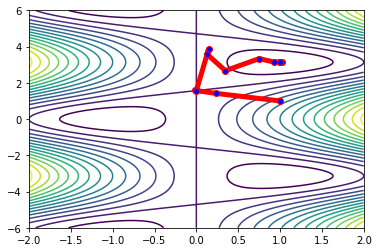

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return(0.5 * x * x + x * np.cos(y))

xmin = -2
xmax = 2
ymin = -6
ymax = 6
xlist = np.linspace(xmin,xmax,1000)
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

Figure 13.3 (b), page 316. 

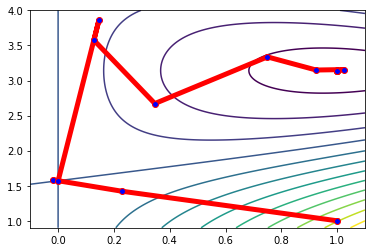

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return(0.5 * x * x + x * np.cos(y))

xmin = -0.1
xmax = 1.1
ymin = 0.9
ymax = 4
xlist = np.linspace(xmin,xmax,1000)
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

### Algorithm 13.2: Quasi-Newton SR1 method

In [13]:
import optimization as opt

def sr1(obj,x0,delta0,eps=1.0e-8,dl=True,maxiter=100):
    n = x0.shape[0]
    xk = x0
    (f,g) = obj(xk)
    H = np.eye(n)
    iters = list()
    k = 0
    eta1 = 0.01
    eta2 = 0.9
    delta = delta0
    iters.append([xk,f,linalg.norm(g),H,delta,0.0,'',''])
    while linalg.norm(g) > eps and k < maxiter:
        k = k + 1
        if dl:
            (step,type) = opt.dogleg(g,H,delta)
        else: 
            (step,type) = opt.truncatedConjugateGradient(g,H,delta)
        (fc,gc) = obj(xk+step)
        y = gc - g
        num = f - fc;
        denom = -scalarInner(step,g) - 0.5 * scalarInner(step,H.dot(step))
        rho = num / denom
        if rho < eta1:
            # Failure: reduce the trust region
            delta = linalg.norm(step) / 2.0
            status = "- " ;
        else:
            # Candidate accepted
            xk = xk + step
            f = fc
            g = gc
            if rho >= eta2:
                # Enlarge the trust region
                delta = 2 * delta
                status = "++"
            else:
                status = "+ "
            # Update the matrix
            term = y - H.dot(step)
            sr1denom = scalarInner(step,term)
            if abs(sr1denom) >= 1.0e-8 * linalg.norm(step) * linalg.norm(term):
                H = H + np.outer(term,term) / sr1denom
        iters.append([xk,f,linalg.norm(g),H,delta,0.0,type,status])
    return xk,iters  

In [16]:
x0 = np.array([[1],[1]])
(sol,iters) = sr1(ex0508noHessian,x0,10,dl=False)
sol

array([[-1.00000000e+00],
       [-1.42859883e-11]])

Table 13.4, p. 322

In [17]:
print("k\txk\t\t\t\tf(xk)\t\t||Grad(xk)||\tDelta\t\tStatus")
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E} {:2s}".format(k,iters[k][0].item(0),iters[k][0].item(1),iters[k][1],iters[k][2],iters[k][4],iters[k][7]))


k	xk				f(xk)		||Grad(xk)||	Delta		Status
0	+1.000000E+00	+1.000000E+00	+1.040302E+00	+1.755165E+00	+1.000000E+01   
1	-5.403023E-01	+1.841471E+00	+2.904302E-01	+9.609418E-01	+1.000000E+01 + 
2	-1.885878E-02	+1.505350E+00	-1.055525E-03	+5.020116E-02	+2.000000E+01 ++
3	-5.260225E-02	+1.483666E+00	-3.193962E-03	+6.269483E-02	+4.000000E+01 ++
4	-5.260225E-02	+1.483666E+00	-3.193962E-03	+6.269483E-02	+2.000000E+01 - 
5	-5.260225E-02	+1.483666E+00	-3.193962E-03	+6.269483E-02	+1.000000E+01 - 
6	-5.260225E-02	+1.483666E+00	-3.193962E-03	+6.269483E-02	+5.000000E+00 - 
7	-5.260225E-02	+1.483666E+00	-3.193962E-03	+6.269483E-02	+2.500000E+00 - 
8	-1.425043E+00	-6.059287E-01	-1.559737E-01	+1.011131E+00	+2.500000E+00 + 
9	-1.425043E+00	-6.059287E-01	-1.559737E-01	+1.011131E+00	+1.176846E+00 - 
10	-7.231360E-01	+3.386836E-01	-4.205939E-01	+3.258057E-01	+1.176846E+00 + 
11	-9.059775E-01	+1.191584E-01	-4.891556E-01	+1.384062E-01	+2.353692E+00 ++
12	-1.034524E+00	-5.000824E-02	-4.981107E-01	+6.288136E-

Table 13.3, page 321

In [18]:
print("k\tHinv(1,1)\tHinv(2,2)\tHinv(1,2)\tlambda1\t\tlambda2")
for k in range(1,len(iters)):
    lbd,v = linalg.eigh(iters[k][3])
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(k,iters[k][3].item((0,0)),iters[k][3].item((1,1)),iters[k][3].item((0,1)),lbd.item(0),lbd.item(1)))


k	Hinv(1,1)	Hinv(2,2)	Hinv(1,2)	lambda1		lambda2
1	+1.387804E+00	+1.161134E+00	-2.499771E-01	+1.000000E+00	+1.548938E+00
2	+1.508521E+00	+1.180871E+00	-2.011660E-01	+1.085261E+00	+1.604131E+00
3	+9.929634E-01	-1.425525E-02	-9.861221E-01	-6.179215E-01	+1.596630E+00
4	+9.929634E-01	-1.425525E-02	-9.861221E-01	-6.179215E-01	+1.596630E+00
5	+9.929634E-01	-1.425525E-02	-9.861221E-01	-6.179215E-01	+1.596630E+00
6	+9.929634E-01	-1.425525E-02	-9.861221E-01	-6.179215E-01	+1.596630E+00
7	+9.929634E-01	-1.425525E-02	-9.861221E-01	-6.179215E-01	+1.596630E+00
8	+1.266085E+00	+7.592718E-01	-5.264844E-01	+4.283833E-01	+1.596973E+00
9	+1.266085E+00	+7.592718E-01	-5.264844E-01	+4.283833E-01	+1.596973E+00
10	+1.458629E+00	+1.271408E+00	-2.124638E-01	+1.132847E+00	+1.597191E+00
11	+1.267492E+00	+9.780357E-01	-4.492642E-01	+6.507632E-01	+1.594764E+00
12	+1.363381E+00	+1.178402E+00	-3.106537E-01	+9.467616E-01	+1.595021E+00
13	+1.406807E+00	+1.221857E+00	-2.672127E-01	+1.031570E+00	+1.597094E+00
14	+1.28094

Figure 13.4 (a), page 320

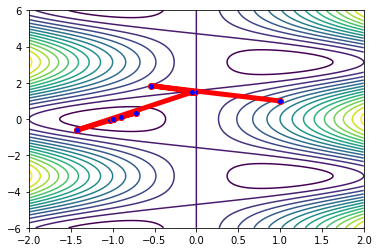

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return(0.5 * x * x + x * np.cos(y))

xmin = -2
xmax = 2
ymin = -6
ymax = 6
xlist = np.linspace(xmin,xmax,1000)
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

Figure 13.4 (b), page 320

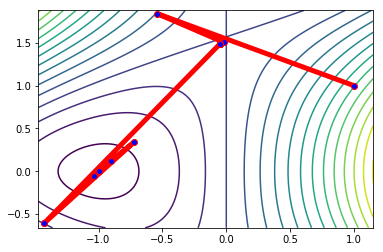

In [20]:
 %matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return(0.5 * x * x + x * np.cos(y))

xmin = -1.47
xmax = 1.15
ymin = -0.66
ymax = 1.88
xlist = np.linspace(xmin,xmax,1000)
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

### Section 13.3: the Rosenbrock problem

In [21]:
from optimizationExamples import exRosenbrock
x0 = np.array([[-1.5],[1.5]])
(sol,iters) = bfgs(exRosenbrock,x0)
print(sol)
print("Number of iterations: {}".format(len(iters)))

[[1.]
 [1.]]
Number of iterations: 35


Figure 13.5 (a), page 323

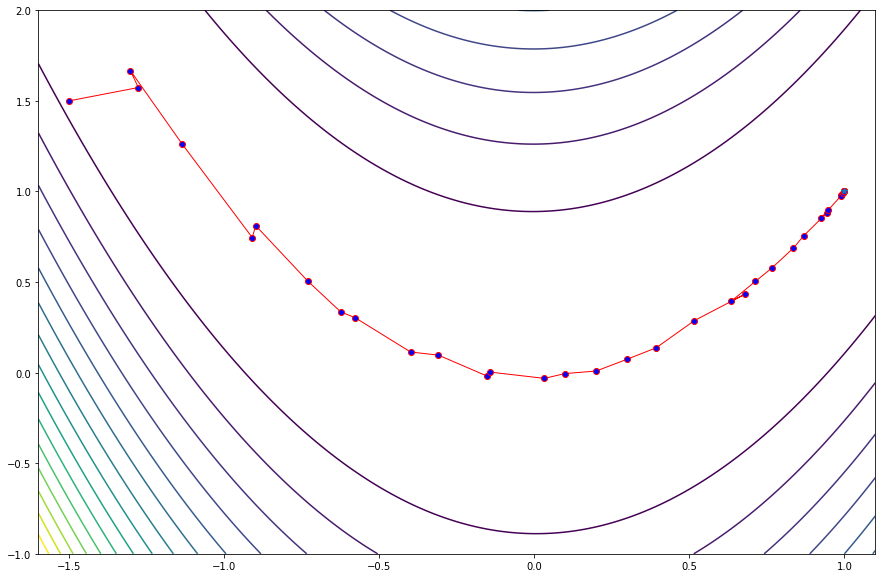

In [22]:
def theFunctionToPlot(x,y):
    return(100 * (y-x*x)**2+(1-x)**2)

xmin = -1.6
xmax = 1.1
xlist = np.linspace(xmin,xmax,1000)
ymin = -1
ymax = 2
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.rcParams["figure.figsize"] = [15,10]
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r',marker='o',mfc='blue')
plt.plot(1,1,marker='*')
plt.show()

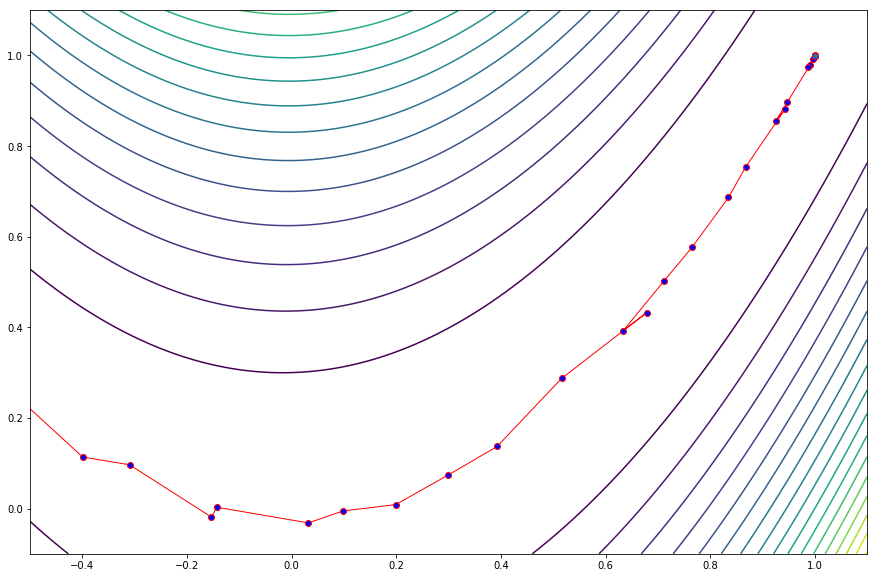

In [23]:
xmin = -0.5
xmax = 1.1
xlist = np.linspace(xmin,xmax,1000)
ymin = -0.1
ymax = 1.1
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.rcParams["figure.figsize"] = [15,10]
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r',marker='o',mfc='blue')
plt.plot(1,1,marker='*')
plt.show()

SR1 with trust region

In [24]:
x0 = np.array([[-1.5],[1.5]])
(sol,iters) = sr1(exRosenbrock,x0,10,dl=False,maxiter=1000)
print(sol)
print("Number of iterations: {}".format(len(iters)))


[[1.]
 [1.]]
Number of iterations: 99


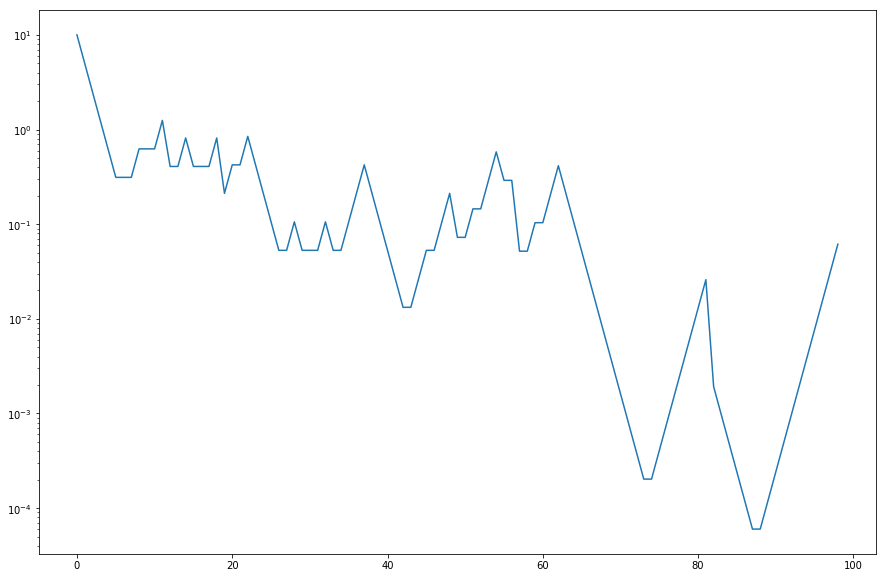

In [25]:
x = np.array([k for k in range(len(iters))])
y = np.array([iters[k][4] for k in range(len(iters))])
plt.semilogy(x,y)
plt.show()

Figure 13.6 (a), page 324

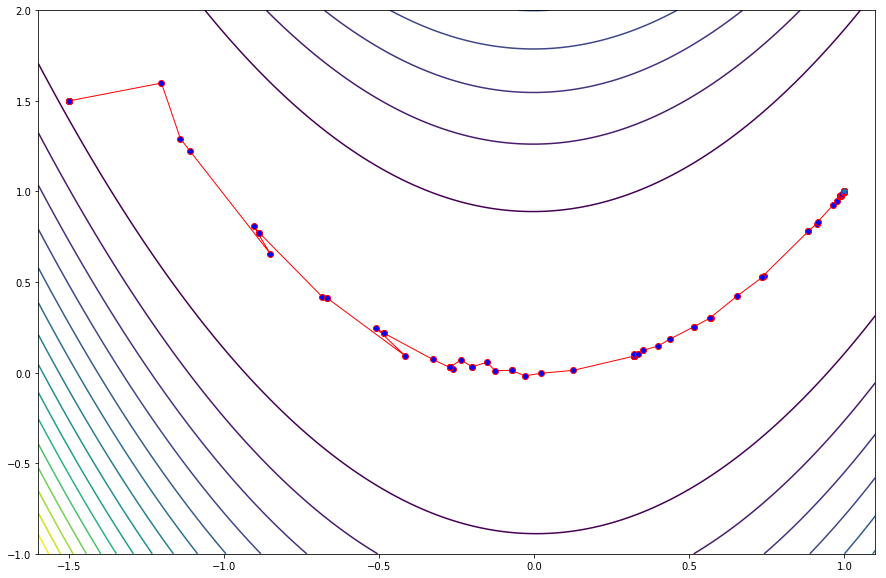

In [26]:
def theFunctionToPlot(x,y):
    return(100 * (y-x*x)**2+(1-x)**2)

xmin = -1.6
xmax = 1.1
xlist = np.linspace(xmin,xmax,1000)
ymin = -1
ymax = 2
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.rcParams["figure.figsize"] = [15,10]
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r',marker='o',mfc='blue')
plt.plot(1,1,marker='*')
plt.show()

Figure 13.6 (b), page 324

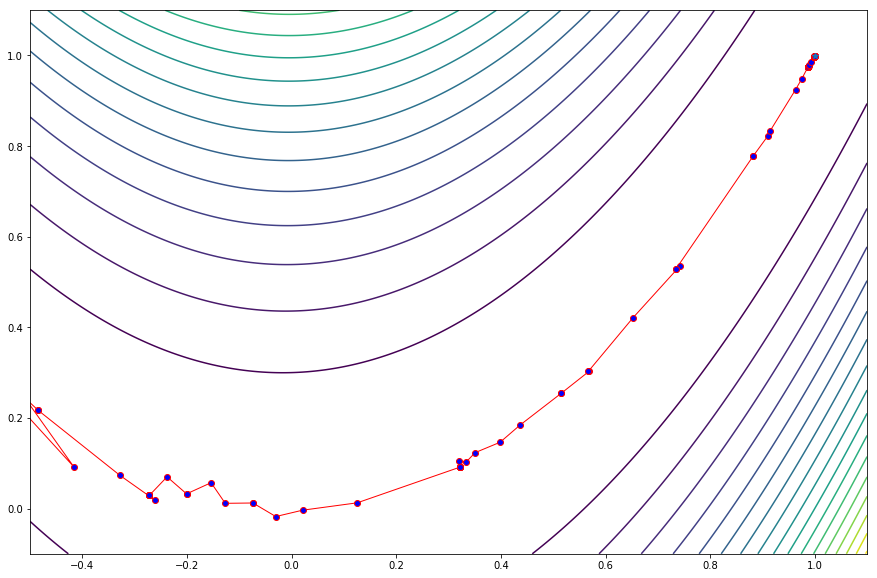

In [27]:
def theFunctionToPlot(x,y):
    return(100 * (y-x*x)**2+(1-x)**2)

xmin = -0.5
xmax = 1.1
xlist = np.linspace(xmin,xmax,1000)
ymin = -0.1
ymax = 1.1
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.rcParams["figure.figsize"] = [15,10]
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r',marker='o',mfc='blue')
plt.plot(1,1,marker='*')
plt.show()

SR1 with linesearch

In [28]:
import numpy as np
from scipy import linalg

# The package optimization contains all the functions presented earlier. In this case, we need the quadraticDirect and the conjugateGrsdient functions.
import optimization as opt

# Define a function simple to call for the inner product
def scalarInner(a,b):
    return(np.asscalar(a.T.dot(b)))


def sr1LineSearch(obj,x0,eps=1.0e-7,maxiter=100):
    n = x0.shape[0]
    I = np.eye(n)
    H = np.eye(n)
    xk = x0
    (f,g) = obj(xk)
    iters = list()
    iters.append([xk,f,linalg.norm(g)])
    k = 0 ;
    while linalg.norm(g) > eps and k < maxiter:
        (L,tau) = opt.modifiedCholesky(H)
        z = linalg.solve_triangular(L,g,lower=True)
        d = linalg.solve_triangular(L.T,-z,lower=False)
        (alpha,lsIters) = opt.lineSearch(obj,xk,d,1.0,0.3,0.7,2)
        xold = xk
        gold = g
        step = alpha * d
        xk = xk + step
        (f,g) = obj(xk)
        k=k+1 
        dbar = xk - xold
        y = g - gold
        term = y - H.dot(step)
        sr1denom = scalarInner(step,term)
        if abs(sr1denom) >= 1.0e-8 * linalg.norm(step) * linalg.norm(term):
            H = H + np.outer(term,term) / sr1denom
        iters.append([xk,f,linalg.norm(g)])
    return xk, iters


In [29]:
from optimizationExamples import exRosenbrock
x0 = np.array([[-1.5],[1.5]])
(sol,iters) = sr1LineSearch(exRosenbrock,x0)
print(sol)
print("Number of iterations: {}".format(len(iters)))

[[1.]
 [1.]]
Number of iterations: 46


Figure 13.7 (a), page 325

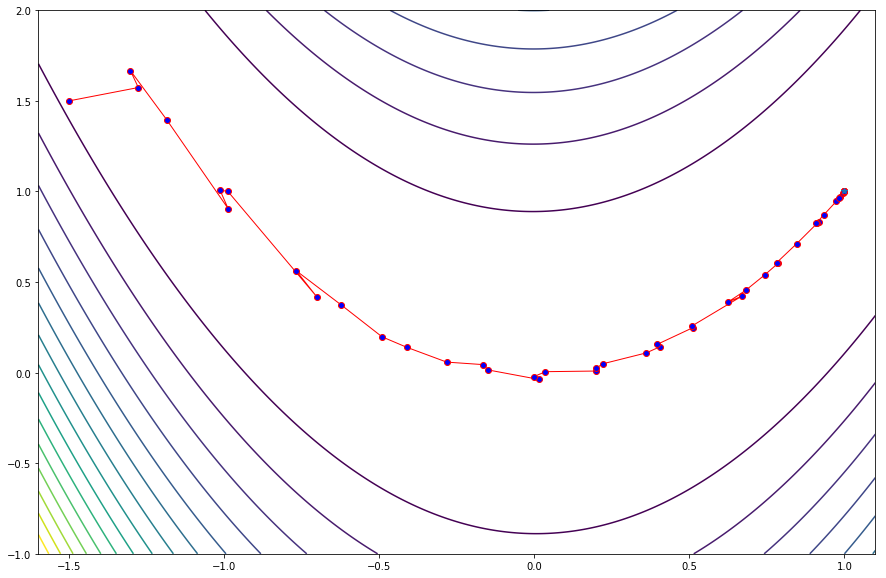

In [30]:
def theFunctionToPlot(x,y):
    return(100 * (y-x*x)**2+(1-x)**2)

xmin = -1.6
xmax = 1.1
xlist = np.linspace(xmin,xmax,1000)
ymin = -1
ymax = 2
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.rcParams["figure.figsize"] = [15,10]
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r',marker='o',mfc='blue')
plt.plot(1,1,marker='*')
plt.show()

Figure 13.7 (b), page 325

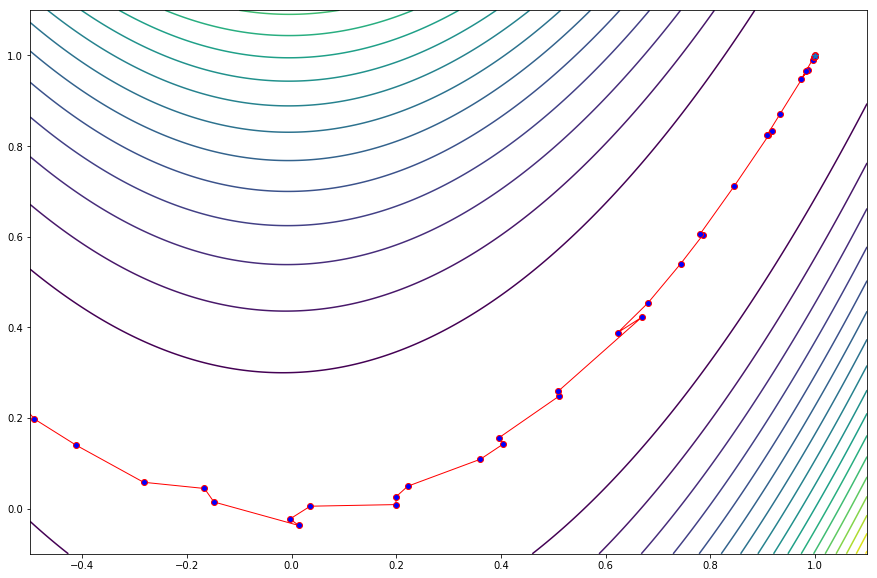

In [31]:
def theFunctionToPlot(x,y):
    return(100 * (y-x*x)**2+(1-x)**2)

xmin = -0.5
xmax = 1.1
xlist = np.linspace(xmin,xmax,1000)
ymin = -0.1
ymax = 1.1
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.rcParams["figure.figsize"] = [15,10]
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r',marker='o',mfc='blue')
plt.plot(1,1,marker='*')
plt.show()